# Advance Plots

In [1]:
"""
cd .\99advance_plots\
jupyter nbconvert --to markdown advplot.ipynb --output README.md
"""
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('png')
plt.rcParams.update({
    "figure.facecolor": "white",
    "axes.facecolor": "white",
})


## Grouped Bar Chart

<div align="center">
<img src="img/df-v1.jpg" alt="v1.jpg" width="800px">
</div>

### Dataset

In [2]:
df = pd.read_csv("v1.csv");
df

,model,Precision,Recall,F-1,level
0,TeKET,0.252252,0.116424,0.159317,1
1,YAKE,0.283784,0.130977,0.179232,1
2,TR,0.220721,0.101871,0.139403,1
3,IFTDF,0.256757,0.118503,0.162162,1
4,PR,0.058559,0.027027,0.036984,1
5,TeKET,0.084719,0.039067,0.053473,2
6,YAKE,0.081648,0.037684,0.051567,2
7,TR,0.064045,0.029559,0.040449,2
8,IFTDF,0.078277,0.036128,0.049438,2
9,PR,0.007491,0.003457,0.004731,2


In [3]:
v=df[df["level"] == 2].drop('level',axis=1)
v

,model,Precision,Recall,F-1
5,TeKET,0.084719,0.039067,0.053473
6,YAKE,0.081648,0.037684,0.051567
7,TR,0.064045,0.029559,0.040449
8,IFTDF,0.078277,0.036128,0.049438
9,PR,0.007491,0.003457,0.004731


### pandas plot

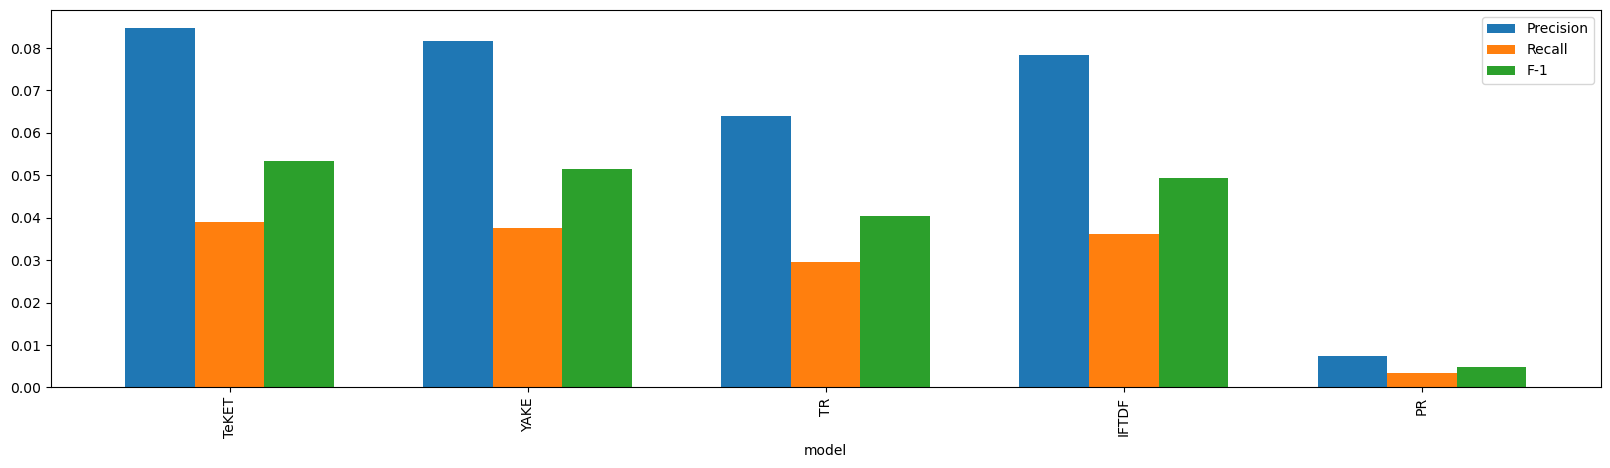

In [130]:
fig=plt.figure(dpi=100,figsize=(20,5))
ax =v.plot.bar(x='model',ax=fig.gca(),width=0.7)



(0.0, 0.1)

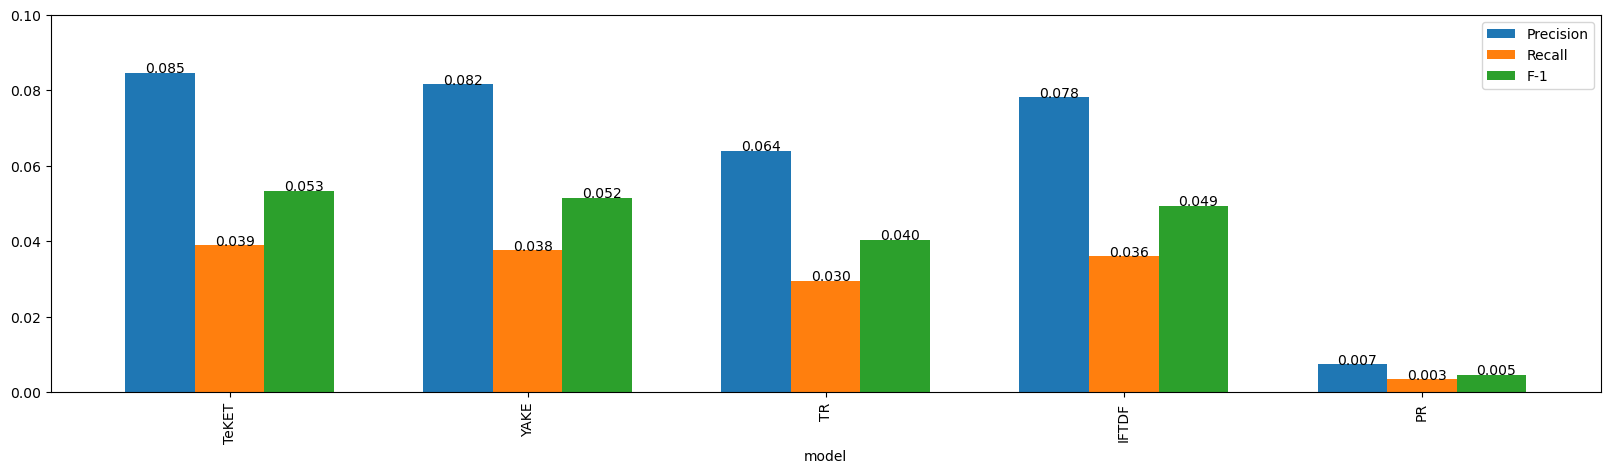

In [129]:
fig=plt.figure(dpi=100,figsize=(20,5))
ax =v.plot.bar(x='model',ax=fig.gca(),width=0.7)
x_offset = -0.05
y_offset = 0
for p in ax.patches:
    b = p.get_bbox()
    val = f"{(b.y1 + b.y0):.3f}"
    ax.annotate(val, ((b.x0 + b.x1) / 2 + x_offset, b.y1 + y_offset))

ax.set_ylim(0,.1)


### matplotlib

- [https://www.geeksforgeeks.org/create-a-grouped-bar-plot-in-matplotlib/](https://www.geeksforgeeks.org/create-a-grouped-bar-plot-in-matplotlib/)

In [5]:
X_ticks = v['model'].tolist()
X = np.arange(len(X_ticks))
X


array([0, 1, 2, 3, 4])

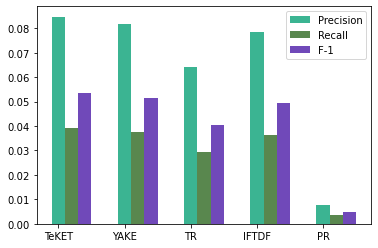

In [6]:
width=0.2
plt.bar(X, v['Precision'], width=width, color=np.random.random((3,)))
plt.bar(X+width, v['Recall'], width=width, color=np.random.random((3,)))
plt.bar(X+width+width, v['F-1'], width=width, color=np.random.random((3,)))
plt.xticks(X, X_ticks)
plt.legend(["Precision", "Recall", "F-1"])
plt.show()

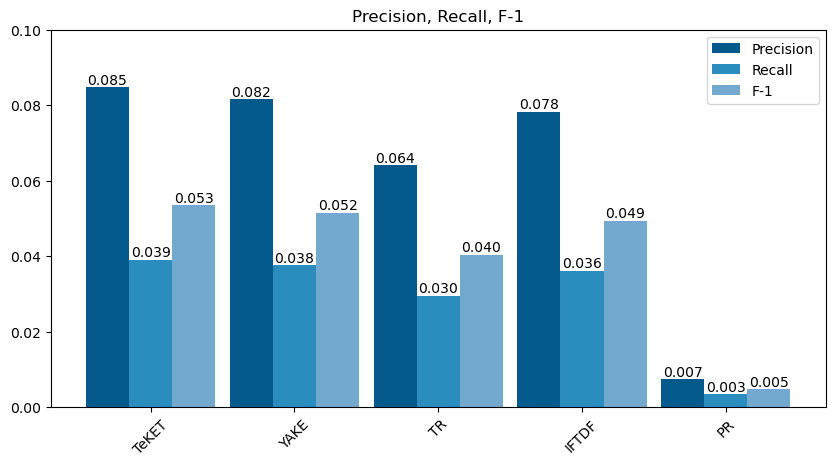

In [117]:
from matplotlib import colors as mcolors

def plot_1vM_1(df,x_col,y_cols,kind='bar',width=0.2,
			figsize=(10,5),dpi=100,
			title=None,y_lim=None,
			x_label=None,y_label=None,
			showBarLabel=False,barLabelFormat=.2):
	# colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
	# 	# Sort colors by hue, saturation, value and name.
	# by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgba(color)[:3])), name)
	# 				for name, color in colors.items())
	# sorted_names = [name for hsv, name in by_hsv]	
	# randint = np.random.randint(0, len(sorted_names)-len(y_cols))
	# colors = sorted_names[randint:randint+len(y_cols)]
	p1 = ['#045a8d', '#2b8cbe', '#74a9cf', '#a6bddb', '#d0d1e6']
	p2=['#a6611a' ,'#dfc27d','#018571' ,'#80cdc1', ]
	# HANDLE X AXIS : start
	X = np.arange(len(df[x_col]))
	X_ticks = df[x_col].tolist()
	# HANDLE X AXIS : end
	
	fig, ax = plt.subplots(figsize=figsize,dpi=dpi)
	for i,y_col in enumerate(y_cols):
		if kind == 'bar':
			
			
			x_data = X + width*i
			y_data = df[y_col]
			ax.bar(x_data, y_data, width=width, color=p1[i])
			if showBarLabel:
				for x,y in zip(x_data,y_data):
					ax.text(x,y,f'%{barLabelFormat}f'%y,ha='center',va='bottom')
		else:
			ax.plot(X, df[y_col],color=np.random.random((3,)))
	
	# HANDLE X AXIS : start
	plt.xticks(X + width, X_ticks, rotation=45)
	# HANDLE X AXIS : end
	plt.legend(y_cols)
	if title:
		plt.title(title)
	if y_lim:
		plt.ylim(y_lim)
	if x_label:
		plt.xlabel(x_label)
	if y_label:
		plt.ylabel(y_label)
	
	
plot_1vM_1(v,'model',['Precision','Recall','F-1'],width=0.3,title='Precision, Recall, F-1',
y_lim=(0,.1),showBarLabel=True,barLabelFormat=.3)
# plt.xlabel('Model')
# plt.ylabel('Score')
# plt.show()

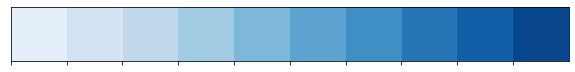

In [84]:
sequential_colors = sns.color_palette("Blues", 10)
sns.palplot(sequential_colors)
# https://medium.com/@morganjonesartist/color-guide-to-seaborn-palettes-da849406d44f
# https://www.codecademy.com/article/seaborn-design-ii
